# The condmat dataset

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

from condmat import *

In [5]:
node_pairs = load('temp/node_pairs.pkl')
distances = load('temp/distances.pkl')
targets = load('temp/targets.pkl')
preferential_attachment = load('temp/preferential-attachment.pkl')

Get the distance, preferential_attachment and target for all node pairs. All these three dicts are keyed on node_pair.

In [19]:
pa_max = {d: max([pa for distance, pa in zip(distances, preferential_attachment) if distance==d]) for d in [2,3,4]}
bins = {d: np.logspace(0, np.log10(pa_max[d]+1), 10) for d in [2,3,4]}

pa = {d: [pa for distance, pa in zip(distances, preferential_attachment) if distance==d] for d in [2,3,4]}
target = {d: [target for distance, target in zip(distances, targets) if distance==d] for d in [2,3,4]}

In [20]:
target_binned_by_pa = {d: stats.binned_statistic(pa[d], target[d], statistic='mean', bins=bins[d]) for d in [2,3,4]}

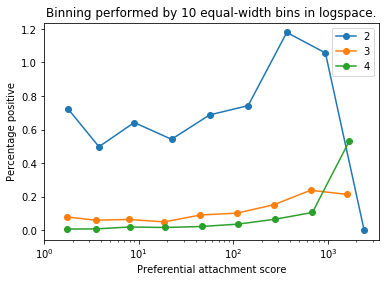

In [23]:
for distance in [2,3,4]:
    statistic, bin_edges, binnumber = stats.binned_statistic(pa[distance], target[distance], statistic='mean', bins=bins[distance])
    pd.Series(statistic*100, index=(bin_edges[1:]+bin_edges[:1])/2).plot(marker='o', label=distance)
plt.title("Binning performed by 10 equal-width bins in logspace.")
plt.xscale('log')
plt.xlim(1)
plt.xlabel('Preferential attachment score')
plt.ylabel('Percentage positive')
plt.legend();

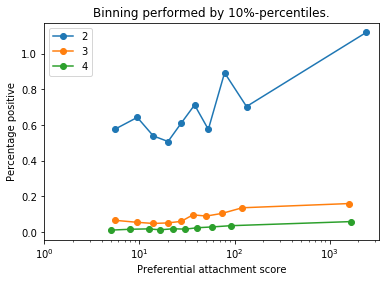

In [24]:
for distance in [2,3,4]:
    statistic, bin_edges, binnumber = stats.binned_statistic(pa[distance], target[distance], statistic='mean', bins=np.percentile(pa[distance], np.arange(0, 101, 10)))
    pd.Series(statistic*100, index=(bin_edges[1:]+bin_edges[:1])/2).plot(marker='o', label=distance)
plt.title("Binning performed by 10%-percentiles.")
plt.xscale('log')
plt.xlim(1)
plt.xlabel('Preferential attachment score')
plt.ylabel('Percentage positive')
plt.legend();

In [6]:
is_directed(node_pairs, preferential_attachment)

100%|██████████| 51858118/51858118 [00:33<00:00, 1556226.25it/s]
